In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
from collections import Counter
from functools import reduce
from itertools import chain
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##### Import the datasets #####
train_df = pd.read_csv('/content/loan_sanction_train.csv')
test_df  = pd.read_csv('/content/loan_sanction_test.csv')

In [3]:
##### Show the train data frame #####
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
##### Show the test dataframe #####
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


EDA - Exploratory Data Analysis

In [5]:
##### Show the shape of this dataset #####
print('The train data frame shape is {} \n'.format(train_df.shape))
print('The test  data frame shape is {} \n'.format(test_df.shape))

The train data frame shape is (614, 13) 

The test  data frame shape is (367, 12) 



In [6]:
##### Show the column names of those dataset #####
print('Train dataset columns name are - {} \n'.format(train_df.columns))

print('*'*120)

print('Test dataset columns name are - {} \n'.format(test_df.columns))

Train dataset columns name are - Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

************************************************************************************************************************
Test dataset columns name are - Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object') 



In [7]:
##### Show the data types of this train #####
for index_, type_ in zip(train_df.dtypes.index, train_df.dtypes.values):
  print('{} data type is  ###  {} '.format(index_, type_))

Loan_ID data type is  ###  object 
Gender data type is  ###  object 
Married data type is  ###  object 
Dependents data type is  ###  object 
Education data type is  ###  object 
Self_Employed data type is  ###  object 
ApplicantIncome data type is  ###  int64 
CoapplicantIncome data type is  ###  float64 
LoanAmount data type is  ###  float64 
Loan_Amount_Term data type is  ###  float64 
Credit_History data type is  ###  float64 
Property_Area data type is  ###  object 
Loan_Status data type is  ###  object 


In [8]:
##### Show the categorical and numerical columns #####
print('Categorical features names are - {} \n'.format(list(train_df.dtypes[train_df.dtypes == 'object'].index)))

print('*'*120)

print('Numerical features names are - {} \n'.format(list(train_df.dtypes[train_df.dtypes != 'object'].index)))

Categorical features names are - ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 

************************************************************************************************************************
Numerical features names are - ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 



In [9]:
##### Check data frame has missing value or not #####
if train_df.isnull().sum().sum() == 0:
  print('Data Frame does not have the NaN value.')
else:
  print('Data Frame has the NaN value and the list of feature is - {}'.format(list(train_df.isnull().sum()[train_df.isnull().sum() > 0].index)))

Data Frame has the NaN value and the list of feature is - ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


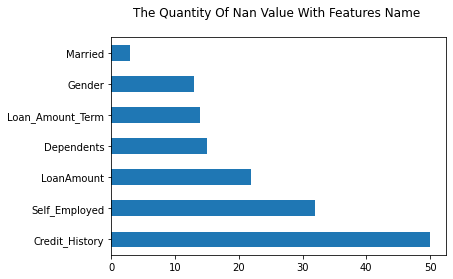

In [10]:
##### Check the Quantity of NaN value #####
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False).plot(kind = 'barh')
plt.title('the Quantity of NaN value with features name \n'.title())
plt.show()

In [11]:
##### Check the value counts of Loan_Status #####
train_df.loc[:, 'Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

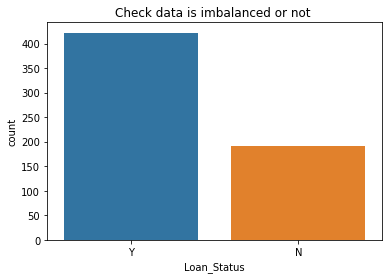

In [12]:
##### Check Data is imbalanced or not #####
plt.title('Check Data is imbalanced or not '.capitalize())
sns.countplot(train_df.loc[:, 'Loan_Status'])
plt.show()

In [13]:
##### Comments after analysis #####
print('The dataset is slightly imbalanced.')

The dataset is slightly imbalanced.


In [14]:
#### Find the unique attribute of the categorical columns #####
for feature_ in train_df.dtypes[train_df.dtypes == 'object'].index:
  if feature_ == 'Loan_ID':
    continue
  else:
    print(f'{feature_} has unoque attribue # ', train_df.loc[:, feature_].nunique())

Gender has unoque attribue #  2
Married has unoque attribue #  2
Dependents has unoque attribue #  4
Education has unoque attribue #  2
Self_Employed has unoque attribue #  2
Property_Area has unoque attribue #  3
Loan_Status has unoque attribue #  2


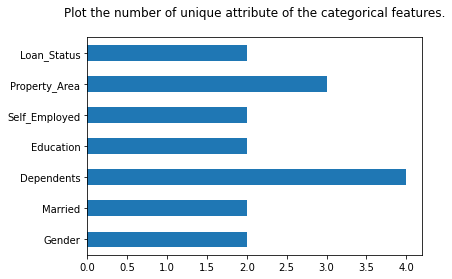

In [15]:
##### Plot the number of unique attribute of the categorical features #####
plt.title('Plot the number of unique attribute of the categorical features.\n')
train_df[train_df.dtypes[train_df.dtypes == 'object'].index].iloc[:, 1:].apply(lambda x: x.nunique()).plot(kind = 'barh')
plt.show()

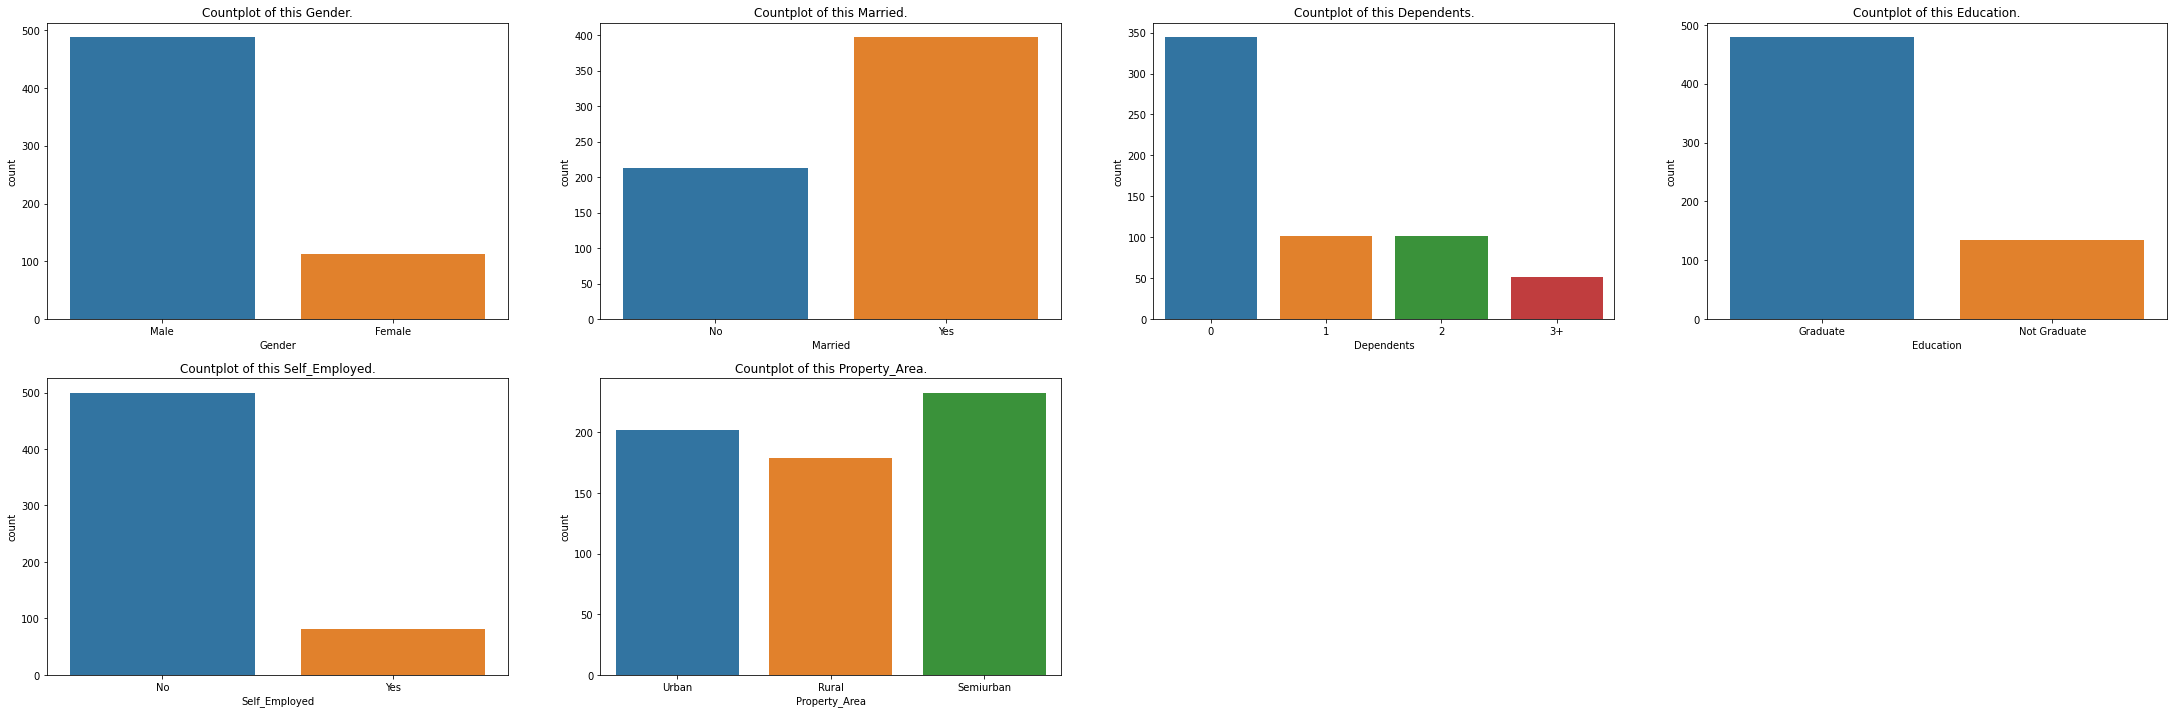

In [16]:
##### Plot each countplot of the categorical data #####
figure = plt.figure(figsize = (38, 12))
for index_ in range(1, 7):
  ax1 = figure.add_subplot(2, 4, index_)
  plt.title('Countplot of this {}.'.format(list(train_df.dtypes[train_df.dtypes == 'object'].index)[index_]))
  sns.countplot(train_df.loc[:, list(train_df.dtypes[train_df.dtypes == 'object'].index)[index_]])
  index_+= 1
plt.show()

In [17]:
##### Convert Loan_Status into Label Encoding #####
train_df.loc[:, 'Loan_Status'] = train_df.loc[:, 'Loan_Status'].map({'Y': 1, 'N': 0})

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [18]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
train_df.loc[:, 'Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [20]:
##### Find out the number of count, mean, sum, of taking Loan that was taken by each Gender ####
print('the number of count, mean, sum, of taking Loan that was taken by each Gender'.capitalize(),'\n')

##### Comments after analysis #####
print('Maximum number of load that has taken by Male and their mean ratio is quite higher than Female')

train_df.groupby(['Gender'])['Loan_Status'].agg(['count', 'sum', 'mean'])

The number of count, mean, sum, of taking loan that was taken by each gender 

Maximum number of load that has taken by Male and their mean ratio is quite higher than Female


,count,sum,mean
Gender,,,
Female,112,75,0.669643
Male,489,339,0.693252


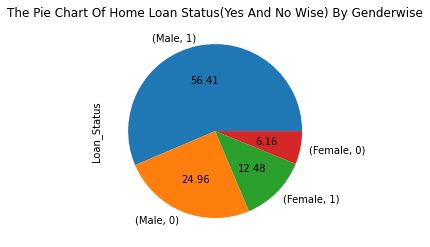

In [21]:
##### Plot the home loan status(Yes and No wise) by gender ####
plt.title('the Pie chart of home loan status(Yes and No wise) by genderwise'.title())
train_df.groupby(['Gender'])['Loan_Status'].value_counts().sort_values(ascending = False).plot(kind = 'pie', autopct='%.2f')
plt.show()

In [22]:
##### Find out, whats the ratio of taking load by gender and Maritial Status #####
print('the ratio of taking load by gender and Maritial Status'.title(),'\n')
train_df.pivot_table(index = 'Gender', columns = 'Married', values = 'Loan_Status', aggfunc = ['count', 'sum', 'mean'])

The Ratio Of Taking Load By Gender And Maritial Status 



count      sum           mean          
Married    No  Yes  No  Yes        No       Yes
Gender                                         
Female     80   31  51   23  0.637500  0.741935
Male      130  357  81  256  0.623077  0.717087

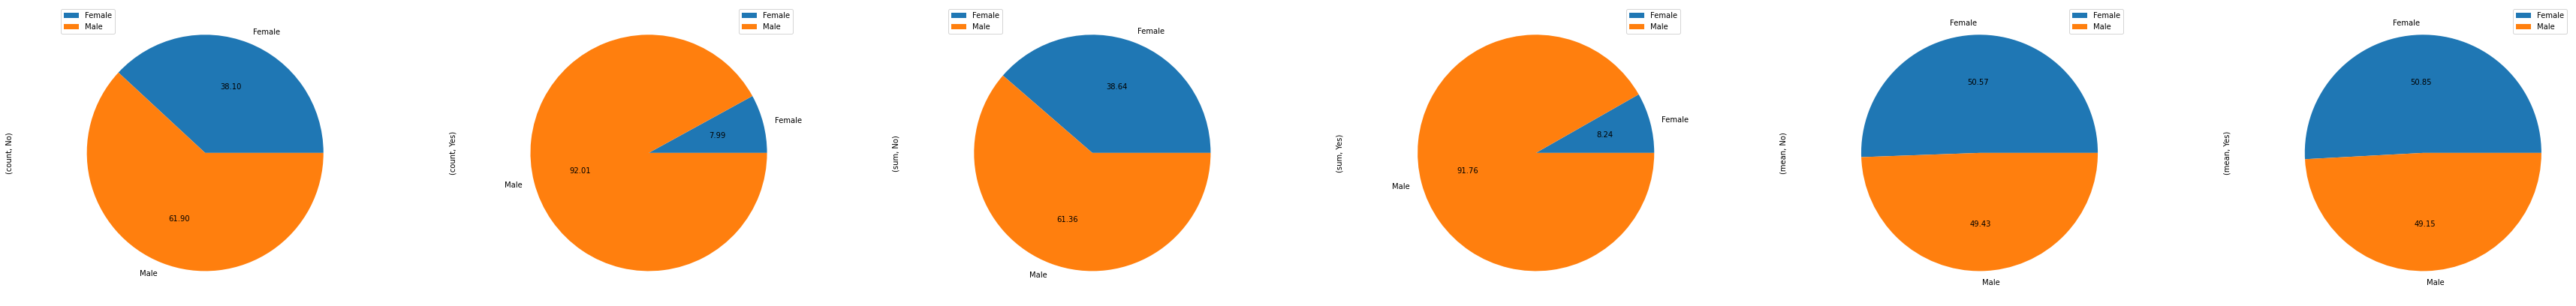

In [23]:
##### Plot it using pie #####
axes = train_df.pivot_table(index = 'Gender', columns = 'Married', values = 'Loan_Status',\
                            aggfunc = ['count', 'sum', 'mean']).plot(kind = 'pie', subplots = True,\
                            figsize = [60, 40], autopct='%.2f')
for ax in axes:
  ax.set_aspect('equal')
  ax.yaxis.set_label_coords(-0.15, 0.5)

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [24]:
##### Comments after analysis #####
print('It is surprised to see that, Female who are single took the home loan higher and \
Male who got married took the home loan higher')

It is surprised to see that, Female who are single took the home loan higher and Male who got married took the home loan higher


In [25]:
##### Convert for my convienient #####
train_df['Dependents_'] = train_df.loc[:, 'Dependents'].map({'0': 'No', '1': 'One', '2': 'Two', '3+': 'Three_and_more'})

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,One
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,No
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,No
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,No


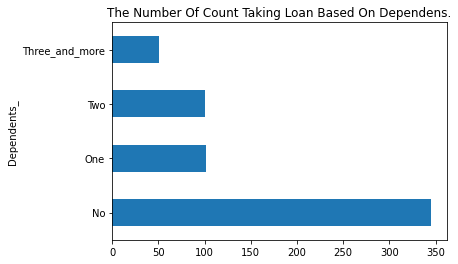

In [26]:
##### 'The number of count taking loan based on Dependens #####
plt.title('The number of count taking loan based on Dependens.'.title())
train_df.groupby(['Dependents_'])['Loan_Status'].count().sort_values(ascending = False).plot(kind = 'barh')
plt.show()

In [27]:
##### The number of count taking loan based on Dependens #####
train_df.groupby(['Dependents_'])[['Loan_Status']].count()

,Loan_Status
Dependents_,
No,345
One,102
Three_and_more,51
Two,101


In [28]:
##### What's the ratio of dependents by Gender and Married #####
train_df.groupby(['Gender', 'Married'])[['Dependents_']].count()

Dependents_
Gender Married             
Female No                78
       Yes               31
Male   No               128
       Yes              349

In [29]:
##### Comments after analysis #####
print('It is see that Male who got married and not as well there dependencies count is quite higher than others.'.capitalize())

It is see that male who got married and not as well there dependencies count is quite higher than others.


In [30]:
##### What's the ratio of taking home loan by education #####
train_df.groupby(['Education'])[['Loan_Status']].agg(['count', 'sum', 'mean'])

Loan_Status               
                   count  sum      mean
Education                              
Graduate             480  340  0.708333
Not Graduate         134   82  0.611940

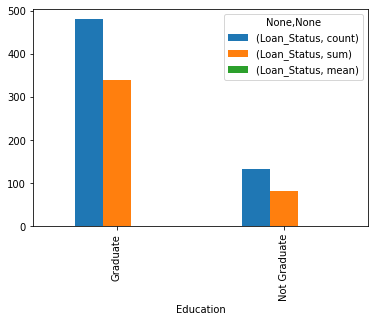

In [31]:
##### The ratio of taking loan by Education-wise #####
train_df.groupby(['Education'])[['Loan_Status']].agg(['count', 'sum', 'mean']).plot(kind = 'bar')
plt.show()

In [32]:
##### What's the ratio of home loan(Yes and No wise) by Gender and Education #####
def find_query(group):
  return group['Loan_Status'].agg(['count', 'sum', 'mean'])
train_df.groupby(['Gender', 'Education']).apply(find_query).sort_values(by = ['count', 'sum', 'mean'], ascending = [False, False, False])

Loan_Status          count    sum      mean
Gender Education                           
Male   Graduate      376.0  271.0  0.720745
       Not Graduate  113.0   68.0  0.601770
Female Graduate       92.0   61.0  0.663043
       Not Graduate   20.0   14.0  0.700000

In [33]:
##### What's the ratio of getting exactly home loan by Gender and Education #####
train_df.groupby(['Gender', 'Education']).apply(lambda x: x.loc[:, 'Loan_Status'].value_counts()).\
                                                rename(columns = {1: 'Yes', 0: 'No'}).sort_values(by = \
                                                ['Yes', 'No'], ascending = [False, False])

Loan_Status          Yes   No
Gender Education             
Male   Graduate      271  105
       Not Graduate   68   45
Female Graduate       61   31
       Not Graduate   14    6

In [34]:
##### Find, what's the ratio of taking home loan based on Self_Employed #####
train_df.groupby(['Self_Employed'])[['Loan_Status']].agg(['count', 'sum', 'mean'])

Loan_Status               
                    count  sum      mean
Self_Employed                           
No                    500  343  0.686000
Yes                    82   56  0.682927

In [35]:
##### Find, what's the ratio of getting home loan(Yes, No wise) based on Self_Employed #####
train_df.groupby(['Self_Employed']).apply(lambda x: x.loc[:, 'Loan_Status'].value_counts())

Loan_Status,1,0
Self_Employed,,
No,343,157
Yes,56,26


In [36]:
##### What's the ratio of taking loan based on their Education and Employement #####
train_df.pivot_table(index = 'Education', columns = 'Self_Employed', \
                     values = 'Loan_Status', aggfunc = ['count', 'sum', 'mean'],\
                     margins = True).sort_values(by = [('count',  'No'), ('count', 'Yes'), ('sum',  'No'), \
                                                       ('sum', 'Yes'), ('mean',  'No'), ('mean', 'Yes')],\
                                                         ascending = [False, False, False, False, False, False])

count           sum               mean                    
Self_Employed    No Yes  All   No Yes  All        No       Yes       All
Education                                                               
All             500  82  582  343  56  399  0.686000  0.682927  0.685567
Graduate        389  65  454  276  46  322  0.709512  0.707692  0.709251
Not Graduate    111  17  128   67  10   77  0.603604  0.588235  0.601562

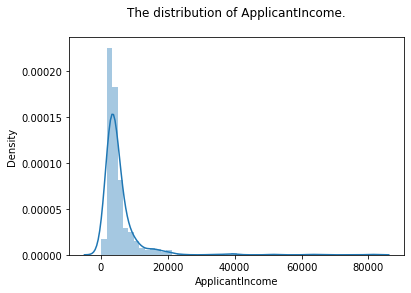

In [37]:
##### Show the distribution of ApplicantIncome #####
plt.title('The distribution of ApplicantIncome.\n')
sns.distplot(train_df.loc[:, 'ApplicantIncome'])
plt.show()

The Relationship Of Applicantincome With Education


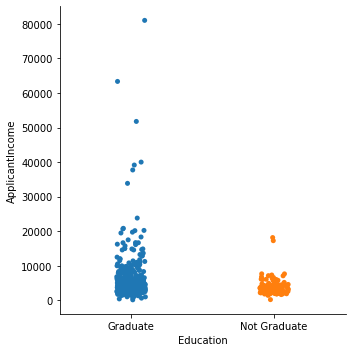

************************************************************************************************************************ 

The Relationship Of Applicantincome, Education With Self Employed


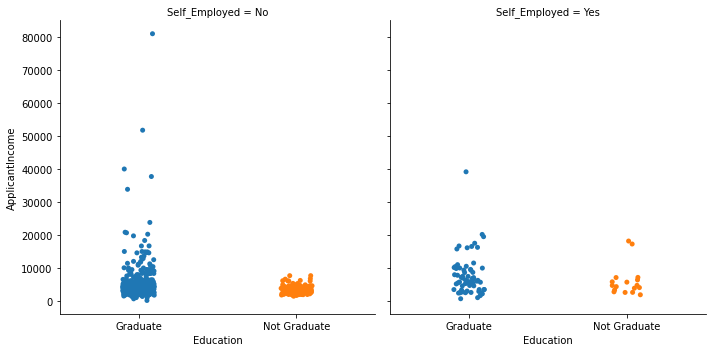

************************************************************************************************************************ 

The Relationship Of Applicantincome, Education With Self Employed


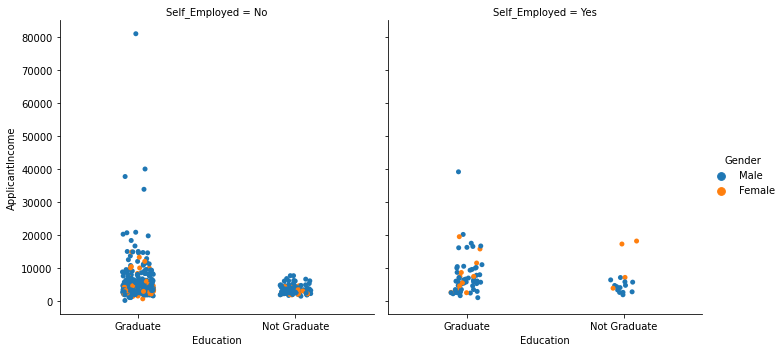

In [38]:
##### Plot the relationship of ApplicantIncome with Education #####
print('the relationship of ApplicantIncome with Education'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', data = train_df)
plt.show()

print('*'*120,'\n')

##### Plot the relationship of ApplicantIncome, Education with Self Employed #####
print('the relationship of ApplicantIncome, Education with Self Employed'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', col = 'Self_Employed', data = train_df)
plt.show()

print('*'*120,'\n')

##### Plot the relationship of ApplicantIncome, Education with Self Employed, Gender #####
print('the relationship of ApplicantIncome, Education with Self Employed'.title())
sns.catplot(x = 'Education', y = 'ApplicantIncome', col = 'Self_Employed', hue = 'Gender', data = train_df)
plt.show()

In [39]:
##### Show, the max, min and average income #####
print('The maximum ApplicantIncome is {} '.format(train_df.loc[:, 'ApplicantIncome'].max(),'\n'))
print('The minimum ApplicantIncome is {} '.format(train_df.loc[:, 'ApplicantIncome'].min(),'\n'))
print('The average ApplicantIncome is {} '.format(train_df.loc[:, 'ApplicantIncome'].mean(),'\n'))

The maximum ApplicantIncome is 81000 
The minimum ApplicantIncome is 150 
The average ApplicantIncome is 5403.459283387622 


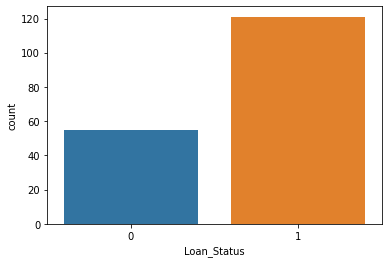

In [40]:
##### Find out, how many applicants get the loan whose average income is greather then 5403 #####
sns.countplot(train_df[train_df.loc[:, 'ApplicantIncome'] > train_df.loc[:, 'ApplicantIncome'].mean()].\
                                            loc[:, 'Loan_Status'])
plt.show()

In [41]:
##### Find out, how many applicants get the loan whose average income is greather then 5403 #####
train_df[train_df.loc[:, 'ApplicantIncome'] > train_df.loc[:, 'ApplicantIncome'].mean()].\
                                            loc[:, 'Loan_Status'].value_counts().reset_index().\
                                            rename(columns = {'index': 'Loan Status', 'Loan_Status': 'Count'})

,Loan Status,Count
0,1,121
1,0,55


In [42]:
##### Create a feature named annual income #####
train_df['annual_income'] = train_df.loc[:, 'ApplicantIncome']*12

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_,annual_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,No,70188
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,One,54996
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,No,36000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,No,30996
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,No,72000


In [43]:
##### Create a new feature for analysis #####
income = {}
for income_ in train_df.loc[:, 'annual_income']:
  if (income_ > 0) & (income_ < 25000):
      income[income_] = 'Lower'
  elif (income_ >= 25001) & (income_ < 46000):
    income[income_] = 'Middle'
  else:
    income[income_] = 'High'

train_df.loc[:, 'annual_income'] = train_df.loc[:, 'annual_income'].map(income)

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_,annual_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,No,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,One,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,No,Middle
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,No,Middle
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,No,High


In [44]:
##### Find out, the relationship of annual_income with Education #####
train_df.pivot_table(index = 'Education', columns = 'annual_income', values = 'Loan_Status', aggfunc = ['count', 'sum', 'mean'])

count               sum                   mean            \
annual_income  High Lower Middle High Lower Middle      High     Lower   
Education                                                                
Graduate        254    34    192  177    22    141  0.696850  0.647059   
Not Graduate     49    16     69   30    11     41  0.612245  0.687500   

                         
annual_income    Middle  
Education                
Graduate       0.734375  
Not Graduate   0.594203

In [45]:
##### What's the ratio of annual income based on Education and Employement #####
def find_query(group):
  return group['annual_income'].value_counts()

train_df.groupby([ 'Education', 'Self_Employed']).apply(find_query).head()

Education  Self_Employed        
Graduate   No             High      198
                          Middle    162
                          Lower      29
           Yes            High       46
                          Middle     15
Name: annual_income, dtype: int64

The relationship of CoapplicantIncome	and ApplicantIncome is given below.



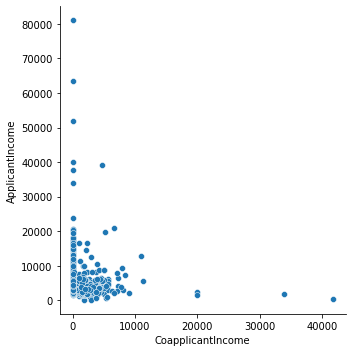

************************************************************************************************************************ 

The relationship of CoapplicantIncome	and ApplicantIncome with Dependents is given below.



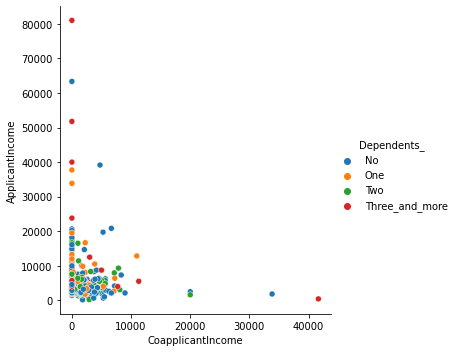

In [46]:
##### Find the relationship of CoapplicantIncome	and ApplicantIncome #####
print('The relationship of CoapplicantIncome	and ApplicantIncome is given below.\n')
sns.relplot(x = 'CoapplicantIncome', y = 'ApplicantIncome', data = train_df)
plt.show()

print('*'*120,'\n')

##### Find the relationship of CoapplicantIncome	and ApplicantIncome with Dependents #####
print('The relationship of CoapplicantIncome	and ApplicantIncome with Dependents is given below.\n')
sns.relplot(x = 'CoapplicantIncome', y = 'ApplicantIncome', hue = 'Dependents_', data = train_df)
plt.show()

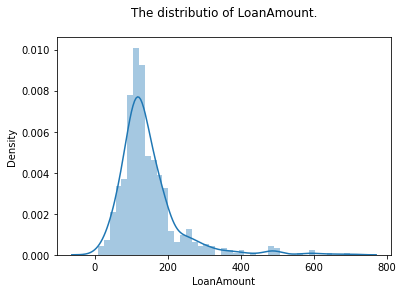

In [47]:
##### The ditribution of LoanAmount #####
plt.title('The distributio of LoanAmount.\n')
sns.distplot(train_df.loc[:, 'LoanAmount'])
plt.show()

The relationship of LoanAmount and ApplicantIncome.



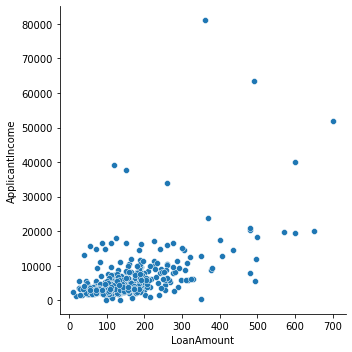

************************************************************************************************************************ 

The relationship of LoanAmount and ApplicantIncome with Gender



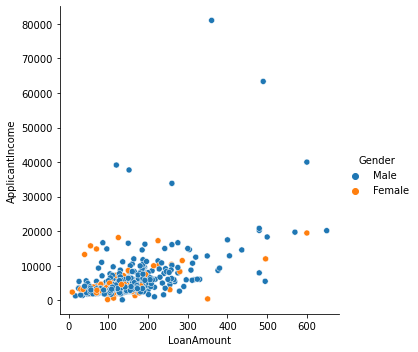

************************************************************************************************************************ 

The relationship of LoanAmount and ApplicantIncome with Gender, and Self Employed



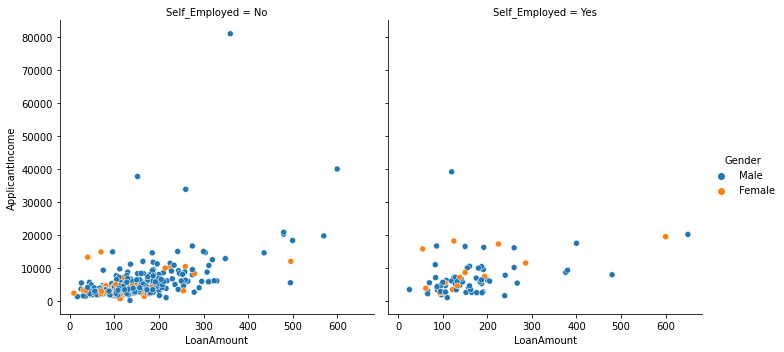

In [48]:
##### The relationship of LoanAmount and ApplicantIncome #####
print('The relationship of LoanAmount and ApplicantIncome.\n')
sns.relplot(x = 'LoanAmount', y = 'ApplicantIncome', data = train_df)
plt.show()

print('*'*120,'\n')

##### The relationship of LoanAmount and ApplicantIncome with Gender #####
print('The relationship of LoanAmount and ApplicantIncome with Gender\n')
sns.relplot(x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Gender', data = train_df)
plt.show()

print('*'*120,'\n')

##### The relationship of LoanAmount and ApplicantIncome with Gender, and self_employed #####
print('The relationship of LoanAmount and ApplicantIncome with Gender, and Self Employed\n')
sns.relplot(x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Gender', col = 'Self_Employed', data = train_df)
plt.show()

In [49]:
##### show the max and min loan #####
print('The maximum home loan amount is = {} '.format(train_df.loc[:, 'LoanAmount'].max(),'\n'))
print('The minimum home loan amount is = {} '.format(train_df.loc[:, 'LoanAmount'].min(),'\n'))
print('The average home loan amount is = {} '.format(train_df.loc[:, 'LoanAmount'].mean(),'\n'))

The maximum home loan amount is = 700.0 
The minimum home loan amount is = 9.0 
The average home loan amount is = 146.41216216216216 


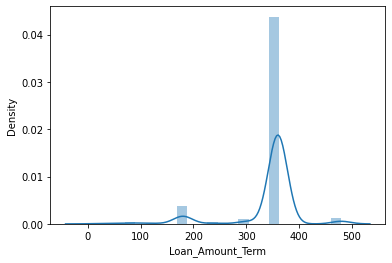

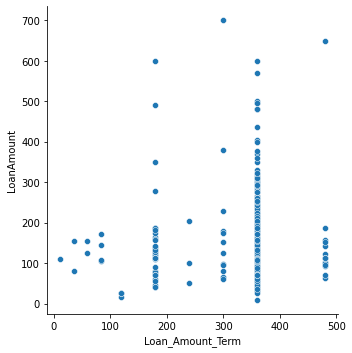

In [50]:
##### Show the distribution of Loan_Amount_Term #####
sns.distplot(train_df.loc[:, 'Loan_Amount_Term'])
plt.show()

print('\n')

sns.relplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = train_df)
plt.show()

In [51]:
##### Find out, the value counts of getting loan(Yes wise) ##### 
train_df.groupby('Loan_Status').apply(lambda x: x.loc[:, 'Credit_History'].value_counts()).\
                                      sort_values(by = [1.0, 0.0], ascending = [False, False])

Credit_History,1.0,0.0
Loan_Status,,
1,378,7
0,97,82


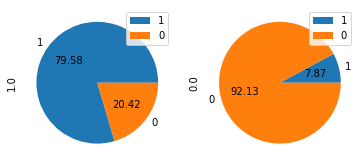

In [52]:
train_df.groupby('Loan_Status').apply(lambda x: x.loc[:, 'Credit_History'].value_counts()).\
                                      sort_values(by = [1.0, 0.0], ascending = [False, False]).plot(kind = 'pie', subplots = True,  autopct='%.2f')

plt.show()

In [53]:
##### Find out the sum, mean of Income and loan of creadit history #####
train_df.groupby(['Credit_History'])[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']].agg(['sum', 'mean'])

ApplicantIncome              CoapplicantIncome               \
                           sum         mean               sum         mean   
Credit_History                                                               
0.0                     505470  5679.438202     137254.000000  1542.179775   
1.0                    2577600  5426.526316     725918.919989  1528.250358   

               LoanAmount             Loan_Amount_Term              
                      sum        mean              sum        mean  
Credit_History                                                      
0.0               12471.0  146.717647          28380.0  341.927711  
1.0               66312.0  144.786026         159804.0  342.192719

In [54]:
##### Find out the sum, mean of Income and loan of creadit history, and Loan_Status #####
train_df.groupby(['Credit_History', 'Loan_Status'])[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']].agg(['sum', 'mean', 'min', 'max'])

ApplicantIncome                            \
                                       sum         mean   min    max   
Credit_History Loan_Status                                             
0.0            0                    441393  5382.841463  1500  81000   
               1                     64077  9153.857143  2137  39999   
1.0            0                    544551  5613.927835   150  33846   
               1                   2033049  5378.436508   210  63337   

                           CoapplicantIncome                             \
                                         sum         mean  min      max   
Credit_History Loan_Status                                                
0.0            0               122567.000000  1494.719512  0.0  11300.0   
               1                14687.000000  2098.142857  0.0   8980.0   
1.0            0               173285.000000  1786.443299  0.0  33837.0   
               1               552633.919989  1461.994497  0.0  20000.0   

                           LoanAmount                           \
                                  sum        mean   min    max   
Credit_History Loan_Status                                       
0.0            0              11027.0  141.371795  45.0  495.0   
               1               1444.0  206.285714  90.0  600.0   
1.0            0              14160.0  155.604396   9.0  570.0   
               1              52152.0  142.103542  17.0  700.0   

                           Loan_Amount_Term                            
                                        sum        mean    min    max  
Credit_History Loan_Status                                             
0.0            0                    26220.0  345.000000  180.0  480.0  
               1                     2160.0  308.571429  180.0  360.0  
1.0            0                    33276.0  343.051546   36.0  480.0  
               1                   126528.0  341.967568   60.0  480.0

The relationship of property_area and loanamount


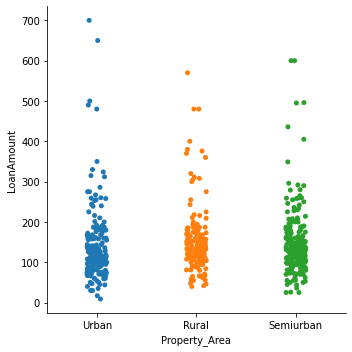

In [55]:
##### Show the relationship of Property_Area and LoanAmount #####
print('the relationship of Property_Area and LoanAmount'.capitalize())
sns.catplot(x = 'Property_Area', y = 'LoanAmount', data = train_df)
plt.show()

In [56]:
train_df.pivot_table(index = ['Gender', 'Education', 'Self_Employed'], columns = ['Loan_Status'], \
                     values = ['ApplicantIncome', 'LoanAmount'], aggfunc = ['count', 'sum', 'mean']).\
                     sort_values(by = [('count', 'ApplicantIncome', 0), ('count', 'ApplicantIncome', 1),
                                      ('count',      'LoanAmount', 0), ('count',      'LoanAmount', 1),
                                      (  'sum', 'ApplicantIncome', 0), (  'sum', 'ApplicantIncome', 1),
                                      (  'sum',      'LoanAmount', 0), (  'sum',      'LoanAmount', 1),
                                      ( 'mean', 'ApplicantIncome', 0), ( 'mean', 'ApplicantIncome', 1),
                                      ( 'mean',      'LoanAmount', 0),  ( 'mean',      'LoanAmount', 1)], \
                     ascending = [False, False, False, False, False, False, False, False, False, False, False, False])

count                       \
                                  ApplicantIncome      LoanAmount        
Loan_Status                                     0    1          0    1   
Gender Education    Self_Employed                                        
Male   Graduate     No                         85  221         81  215   
       Not Graduate No                         38   58         34   56   
Female Graduate     No                         24   51         24   50   
Male   Graduate     Yes                        14   36         13   35   
       Not Graduate Yes                         6    7          6    7   
Female Not Graduate No                          5    9          4    9   
       Graduate     Yes                         5    6          5    5   
       Not Graduate Yes                         1    3          1    3   

                                              sum                      \
                                  ApplicantIncome          LoanAmount   
Loan_Status                                     0        1          0   
Gender Education    Self_Employed                                       
Male   Graduate     No                     584534  1125936    14127.0   
       Not Graduate No                     135452   204166     4092.0   
Female Graduate     No                      97350   224291     2835.0   
Male   Graduate     Yes                     97724   294232     2105.0   
       Not Graduate Yes                     24893    31089      925.0   
Female Not Graduate No                      14705    26051      434.0   
       Graduate     Yes                     31624    57281      817.0   
       Not Graduate Yes                      3867    42570       62.0   

                                                      mean                \
                                           ApplicantIncome                 
Loan_Status                              1               0             1   
Gender Education    Self_Employed                                          
Male   Graduate     No             31475.0     6876.870588   5094.733032   
       Not Graduate No              6476.0     3564.526316   3520.103448   
Female Graduate     No              6066.0     4056.250000   4397.862745   
Male   Graduate     Yes             6555.0     6980.285714   8173.111111   
       Not Graduate Yes              814.0     4148.833333   4441.285714   
Female Not Graduate No               909.0     2941.000000   2894.555556   
       Graduate     Yes             1020.0     6324.800000   9546.833333   
       Not Graduate Yes              488.0     3867.000000  14190.000000   

                                                           
                                   LoanAmount              
Loan_Status                                 0           1  
Gender Education    Self_Employed                          
Male   Graduate     No             174.407407  146.395349  
       Not Graduate No             120.352941  115.642857  
Female Graduate     No             118.125000  121.320000  
Male   Graduate     Yes            161.923077  187.285714  
       Not Graduate Yes            154.166667  116.285714  
Female Not Graduate No             108.500000  101.000000  
       Graduate     Yes            163.400000  204.000000  
       Not Graduate Yes             62.000000  162.666667

<Figure size 1080x432 with 0 Axes>

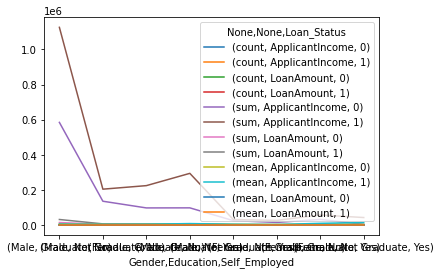

In [57]:
plt.figure(figsize = (15, 6))
train_df.pivot_table(index = ['Gender', 'Education', 'Self_Employed'], columns = ['Loan_Status'], \
                     values = ['ApplicantIncome', 'LoanAmount'], aggfunc = ['count', 'sum', 'mean']).\
                     sort_values(by = [('count', 'ApplicantIncome', 0), ('count', 'ApplicantIncome', 1),
                                      ('count',      'LoanAmount', 0), ('count',      'LoanAmount', 1),
                                      (  'sum', 'ApplicantIncome', 0), (  'sum', 'ApplicantIncome', 1),
                                      (  'sum',      'LoanAmount', 0), (  'sum',      'LoanAmount', 1),
                                      ( 'mean', 'ApplicantIncome', 0), ( 'mean', 'ApplicantIncome', 1),
                                      ( 'mean',      'LoanAmount', 0),  ( 'mean',      'LoanAmount', 1)], \
                     ascending = [False, False, False, False, False, False, False, False, False, False, False, False]).plot()

plt.show()

In [58]:
##### Drop some columns from the dataset #####
[train_df.drop(column_, axis = 1, inplace = True) for column_ in ['Loan_ID', 'Dependents_',	'annual_income']]
[test_df.drop(column_, axis = 1, inplace = True) for column_ in ['Loan_ID']]

train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [59]:
##### Describe of this dataset #####
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [60]:
##### Find the correlation of this dataset #####
train_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


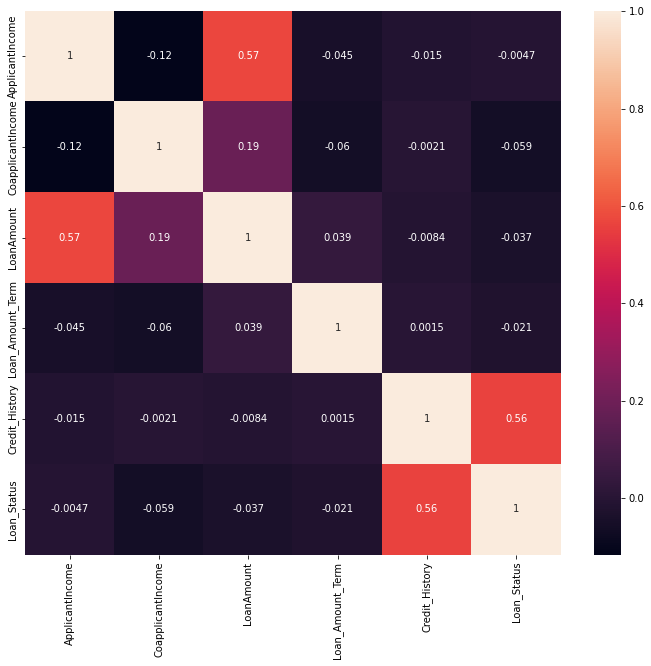

In [61]:
##### plot this corr() in a heatmap #####
plt.figure(figsize = (12, 10))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

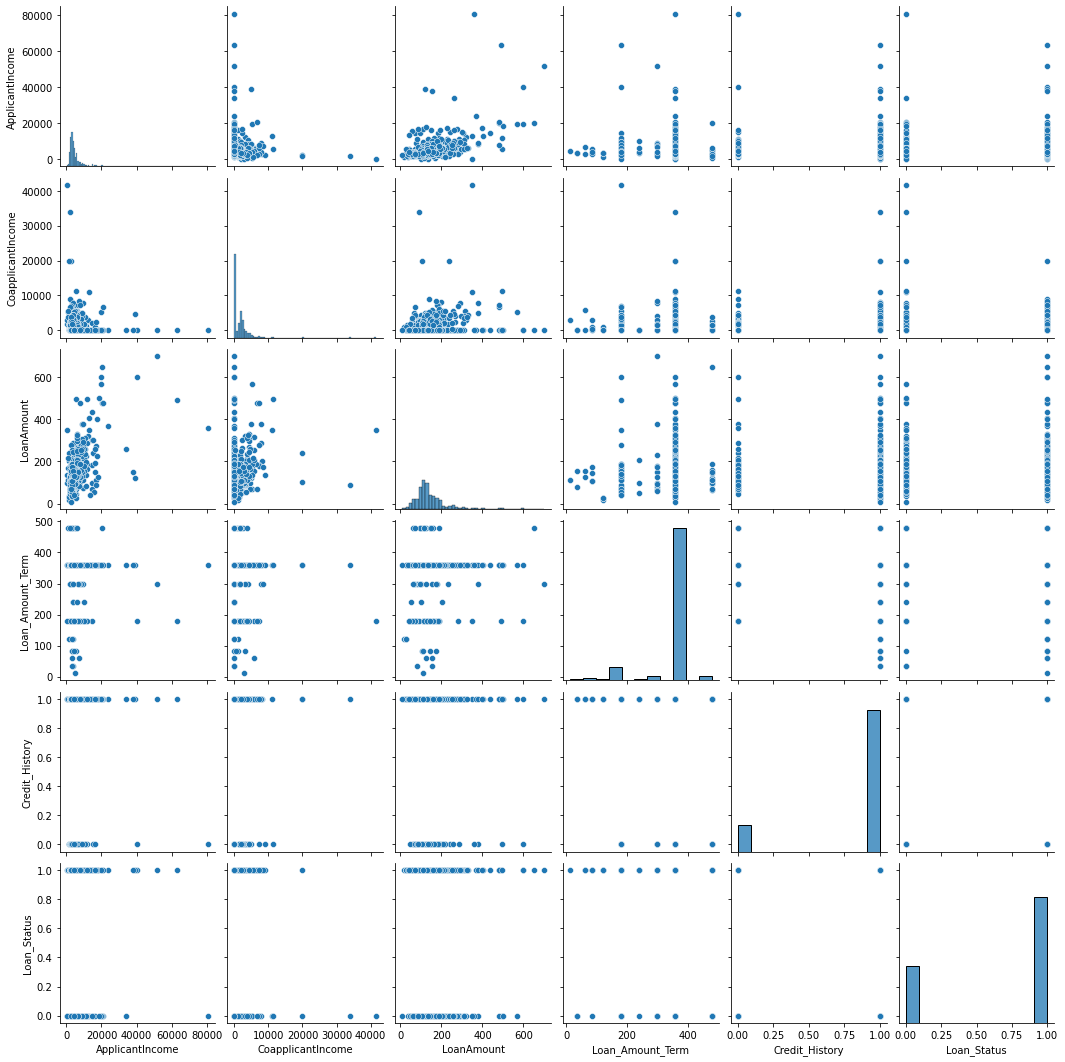

In [62]:
##### plot the pairplot of this dataset #####
sns.pairplot(train_df)
plt.show()

In [63]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [64]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
train_df.shape, test_df.shape

((614, 12), (367, 11))

Handle the Categorical Data in Train DataFrame

In [66]:
##### Handle the categorical feature's NaN value with a new attribute called Missing #####
for feature_ in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
  train_df.loc[:, feature_] = np.where(train_df.loc[:, feature_].isnull(), 'Missing', train_df.loc[:, feature_])
  print('{} feature completed.'.format(feature_))

print('\n\n')

for feature_ in ['LoanAmount', 'Loan_Amount_Term']:
  train_df.loc[:, feature_] = np.where(train_df.loc[:, feature_].isnull(), train_df.loc[:, feature_].mean(), train_df.loc[:, feature_])
  print('{} feature completed.'.format(feature_))

print('\n\n')

train_df.loc[:, 'Credit_History'] = np.where(train_df.loc[:, 'Credit_History'].isnull(), 2, train_df.loc[:, 'Credit_History'])

Gender feature completed.
Married feature completed.
Dependents feature completed.
Self_Employed feature completed.



LoanAmount feature completed.
Loan_Amount_Term feature completed.





Handle the Categorical Data in Test DataFrame

In [67]:
##### Handle the categorical feature's NaN value with a new attribute called Missing #####
for feature_ in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
  test_df.loc[:, feature_] = np.where(test_df.loc[:, feature_].isnull(), 'Missing', test_df.loc[:, feature_])
  print('{} feature completed.'.format(feature_))

print('\n\n')

for feature_ in ['LoanAmount', 'Loan_Amount_Term']:
  test_df.loc[:, feature_] = np.where(test_df.loc[:, feature_].isnull(), test_df.loc[:, feature_].mean(), test_df.loc[:, feature_])
  print('{} feature completed.'.format(feature_))

print('\n\n')

test_df.loc[:, 'Credit_History'] = np.where(test_df.loc[:, 'Credit_History'].isnull(), 2, test_df.loc[:, 'Credit_History'])

Gender feature completed.
Married feature completed.
Dependents feature completed.
Self_Employed feature completed.



LoanAmount feature completed.
Loan_Amount_Term feature completed.





In [68]:
train_df.shape, test_df.shape

((614, 12), (367, 11))

In [69]:
y_train_df = train_df.loc[:, 'Loan_Status']
train_df.drop(['Loan_Status'], axis = 1, inplace = True)

In [70]:
train_df.shape, test_df.shape

((614, 11), (367, 11))

Handle the categorical Data

In [71]:
test_df_ = pd.get_dummies(data = test_df, drop_first = True)
test_df_.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Missing,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_Missing,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,0,1,0,0,0,0,0,1,0,0,1
1,3076,1500,126.0,360.0,1.0,1,0,1,1,0,0,0,0,1,0,0,1
2,5000,1800,208.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,0,1
3,2340,2546,100.0,360.0,2.0,1,0,1,0,1,0,0,0,1,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,0,1,1,0,0,1


In [72]:
test_df_.shape

(367, 17)

In [73]:
##### Preprocessing the test data frame #####
MinMaxScaler_ = StandardScaler()
test_scaled = pd.DataFrame(MinMaxScaler_.fit_transform(test_df_), columns = test_df_.columns)
test_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Missing,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_Missing,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.169311,0.532181,-0.175781,0.758358,-0.433246,-0.437674,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353
1,-0.352692,-0.029848,-0.166482,0.270603,0.169311,0.532181,-0.175781,0.758358,2.308156,-0.437674,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353
2,0.039641,0.098849,1.180807,0.270603,0.169311,0.532181,-0.175781,0.758358,-0.433246,2.284806,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353
3,-0.502774,0.418877,-0.593671,0.270603,2.240543,0.532181,-0.175781,0.758358,-0.433246,2.284806,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353
4,-0.311909,-0.673335,-0.955139,0.270603,0.169311,0.532181,-0.175781,-1.318638,-0.433246,-0.437674,-0.349749,-0.167365,1.835497,0.442086,-0.334845,-0.679817,1.273353


Using K-Means Clustering in this test dataframe

In [74]:
wcss_ = []
for n_cluster in range(2, 5):
  KMeans_ = KMeans(n_clusters = n_cluster, max_iter = 500)
  KMeans_.fit_predict(test_scaled)
  wcss_.append(KMeans_.inertia_)
  print(f'The score is = {silhouette_score(test_scaled.values, KMeans_.labels_)} for n_cluster = {n_cluster}')

The score is = 0.20591466554662705 for n_cluster = 2
The score is = 0.09944809930840814 for n_cluster = 3
The score is = 0.1269744160155411 for n_cluster = 4


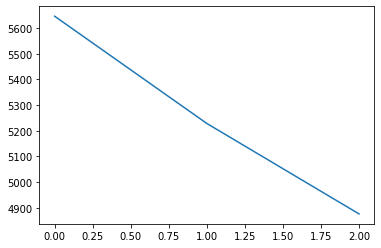

In [75]:
plt.plot(wcss_)

In [76]:
##### Take n_cluster = 2 in KMeans #####
KMeans_ = KMeans(n_clusters = 2, max_iter = 500)
target_ = KMeans_.fit_predict(test_scaled)
print(target_)

[1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]


In [77]:
df1_ = pd.concat([test_scaled, pd.DataFrame(target_, columns = ['Loan_Status'])], axis = 1, ignore_index = True)
df1_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.186461,-0.673335,-0.429368,0.270603,0.169311,0.532181,-0.175781,0.758358,-0.433246,-0.437674,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.169311,0.532181,-0.175781,0.758358,2.308156,-0.437674,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353,1
2,0.039641,0.098849,1.180807,0.270603,0.169311,0.532181,-0.175781,0.758358,-0.433246,2.284806,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353,1
3,-0.502774,0.418877,-0.593671,0.270603,2.240543,0.532181,-0.175781,0.758358,-0.433246,2.284806,-0.349749,-0.167365,-0.544812,0.442086,-0.334845,-0.679817,1.273353,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.169311,0.532181,-0.175781,-1.318638,-0.433246,-0.437674,-0.349749,-0.167365,1.835497,0.442086,-0.334845,-0.679817,1.273353,1


In [78]:
pd.DataFrame(MinMaxScaler_.fit_transform(pd.get_dummies(data = train_df, drop_first = True)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.072991,-0.554487,0.000000,0.279851,0.134703,0.505592,-0.147074,1.372089,-1.357421,-0.446339,-0.443713,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.219273,0.279851,0.134703,0.505592,-0.147074,-0.728816,0.736691,2.240448,-0.443713,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.957641,0.279851,0.134703,0.505592,-0.147074,-0.728816,0.736691,-0.446339,-0.443713,-0.300975,-0.158246,-0.528362,-2.094270,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.314547,0.279851,0.134703,0.505592,-0.147074,-0.728816,0.736691,-0.446339,-0.443713,-0.300975,-0.158246,1.892641,0.477493,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.064454,0.279851,0.134703,0.505592,-0.147074,1.372089,-1.357421,-0.446339,-0.443713,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,0.134703,-1.977878,-0.147074,1.372089,-1.357421,-0.446339,-0.443713,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,-0.700208
610,-0.212557,-0.554487,-1.267279,-2.518655,0.134703,0.505592,-0.147074,-0.728816,0.736691,-0.446339,-0.443713,3.322532,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,-0.700208
611,0.437174,-0.472404,1.269371,0.279851,0.134703,0.505592,-0.147074,-0.728816,0.736691,2.240448,-0.443713,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,1.428147
612,0.357064,-0.554487,0.483367,0.279851,0.134703,0.505592,-0.147074,-0.728816,0.736691,-0.446339,2.253710,-0.300975,-0.158246,-0.528362,0.477493,-0.392601,-0.782016,1.428147


In [138]:
test_df['Book_Status'] = target_
train_df['Book_Status'] = y_train_df
test_df.shape, train_df.shape

((367, 12), (614, 12))

In [139]:
new_df = pd.concat([train_df, test_df], axis = 0, ignore_index = True)
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Book_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [140]:
y = new_df.loc[:, 'Book_Status']
new_df.drop(['Book_Status'], axis = 1, inplace = True)

scaled_df = MinMaxScaler_.fit_transform(pd.get_dummies(data = new_df, drop_first = True))
print(scaled_df)

[[ 0.11756522 -0.5895062   0.05039374 ... -0.37155221 -0.74311183
   1.36690199]
 [-0.10484435 -0.03456127 -0.19087972 ... -0.37155221 -0.74311183
  -0.73158135]
 [-0.38294415 -0.5895062  -1.00332937 ...  2.6914118  -0.74311183
   1.36690199]
 ...
 [-0.33902441  0.14391903 -0.21708778 ... -0.37155221  1.34569248
  -0.73158135]
 [-0.03158622  0.29111928  0.20224107 ... -0.37155221 -0.74311183
  -0.73158135]
 [ 0.70626544 -0.5895062  -0.58400052 ...  2.6914118  -0.74311183
  -0.73158135]]


In [141]:
##### Use ADASYN for handle the imbalanced data #####

In [142]:
ADASYN_ = KMeansSMOTE()
scaled_df, y = ADASYN_.fit_resample(scaled_df, y)

In [143]:
##### Split the dataset into train and test #####
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.25, random_state = 42)

print('The X_train shape is {}'.format(X_train.shape),'\n')
print('The X_test  shape is {}'.format(X_test.shape),'\n')
print('The y_train shape is {}'.format(y_train.shape),'\n')
print('The y_test  shape is {}'.format(y_test.shape),'\n')

The X_train shape is (1079, 18) 

The X_test  shape is (360, 18) 

The y_train shape is (1079,) 

The y_test  shape is (360,) 



Use Deep Learning to predict the model

In [153]:
##### Create a sequential model #####
model = Sequential()

##### Create first hidden layer with 64 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X_train.shape[1]))
model.add(Dropout(0.6))

##### Create second hidden layer with 32 neurons #####
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))

##### Create an output layer with sigmoid #####
model.add(Dense(units = 1, activation = 'sigmoid'))

##### Compile the model #####
model.compile(optimizer=  'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Show the model summary #####
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                1216      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [154]:
##### Fit the model and store the history to check the train and test as well as loss performance ####
history_ = model.fit(x = X_train, y = y_train, batch_size = 16, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
68/68 [==============================] - 1s 5ms/step - loss: 1.0777 - accuracy: 0.5422 - val_loss: 0.5037 - val_accuracy: 0.8000
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 0.7944 - accuracy: 0.6265 - val_loss: 0.4560 - val_accuracy: 0.8194
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.6830 - val_loss: 0.4410 - val_accuracy: 0.8222
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6969 - val_loss: 0.4321 - val_accuracy: 0.8278
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7220 - val_loss: 0.4247 - val_accuracy: 0.8278
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7563 - val_loss: 0.4237 - val_accuracy: 0.8333
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7637 - val_loss: 0.4175 - val_accuracy: 0.8389
Epoch 8/100
6

In [164]:
##### Find the evalaution #####
predicted_ = [1 if pred_ > 0.5 else 0 for pred_ in model.predict(X_test)]

print('The accuracy score is  = ', accuracy_score(predicted_, y_test),'\n')
print('The precision score is = ', precision_score(predicted_, y_test),'\n')
print('The recall score is    = ', recall_score(predicted_, y_test),'\n')
print('The f1_score score is  = ', f1_score(predicted_, y_test),'\n')

12/12 [==============================] - 0s 2ms/step
The accuracy score is  =  0.8361111111111111 

The precision score is =  0.9132947976878613 

The recall score is    =  0.7821782178217822 

The f1_score score is  =  0.8426666666666667 



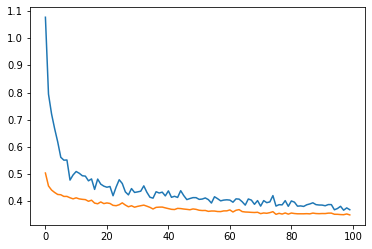

In [165]:
##### Plot the performance #####
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.show()

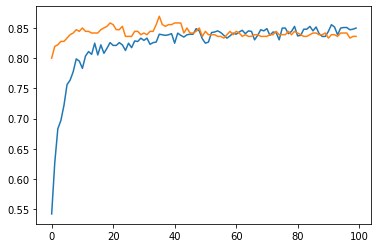

In [166]:
##### Plot the performance #####
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.show()